### Outlier Detection

### Data
Four datasets are provided with this assignment. Each dataset has 500-600 points and 2 features.

In [13]:
import pandas as pd
import numpy as np
import math
from itertools import product
import random
import matplotlib.pyplot as plt
%matplotlib inline
import warnings # for hiding warnings
warnings.filterwarnings('ignore')

In [135]:
base_path = r'C:\Users\wayiqin\Downloads\Data_mining\Assignmen4' # path to the folder that contains the dataset.csv.
dataset_name = 'moons.csv'
dataset_path = rf'{base_path}/{dataset_name}'
dataset1 = pd.read_csv(dataset_path, header=None) # extract each trasaction in each line
dataset1

,0,1
0,0.784950,-0.520411
1,0.241175,0.977350
2,-0.635824,0.750920
3,1.213320,-0.624882
4,-0.386903,0.752005
...,...,...
595,-1.007266,0.090117
596,0.801209,0.033097
597,0.394946,-0.116183
598,-0.321788,0.895098


In [136]:
base_path = r'C:\Users\wayiqin\Downloads\Data_mining\Assignmen4'
dataset_name = "one_center.csv"
dataset_path = rf'{base_path}/{dataset_name}'
dataset2 = pd.read_csv(dataset_path, header=None) # extract each trasaction in each line
dataset2

,0,1
0,-0.239828,0.310179
1,-0.187574,-0.613098
2,-1.008203,-0.269727
3,-0.337166,0.015915
4,-0.173725,-0.290634
...,...,...
505,0.006116,0.784630
506,-0.249016,0.964766
507,0.112126,-0.839344
508,0.106740,-0.604287


In [137]:
base_path = r'C:\Users\wayiqin\Downloads\Data_mining\Assignmen4'
dataset_name = "two_centers.csv"
dataset_path = rf'{base_path}/{dataset_name}'
dataset3 = pd.read_csv(dataset_path, header=None) # extract each trasaction in each line
dataset3

,0,1
0,1.760172,2.310179
1,-2.187574,-2.613098
2,0.991797,1.730273
3,1.662834,2.015915
4,1.826275,1.709366
...,...,...
505,-1.993884,-1.215370
506,1.750984,2.964766
507,-1.887874,-2.839344
508,-1.893260,-2.604287


In [138]:
base_path = r'C:\Users\wayiqin\Downloads\Data_mining\Assignmen4'
dataset_name = "two_centers_scattered.csv"
dataset_path = rf'{base_path}/{dataset_name}'
dataset4 = pd.read_csv(dataset_path, header=None) # extract each trasaction in each line
dataset4

,0,1
0,1.280516,2.930537
1,-2.112544,-2.367859
2,-1.024610,1.190818
3,0.988501,2.047746
4,1.478824,1.128097
...,...,...
505,-1.996330,-1.529222
506,1.252951,4.894298
507,-1.932724,-2.503607
508,-1.935956,-2.362572


### 1. 𝜒2-statistic
- A. Detect the outliers by applying the boxplot method on the calculated 𝜒2-statistics (points that their 𝜒2 fall beyond 1.5 times the interquartile range above the third quartile or below the first quartile are considered as outliers).

In [58]:
# dataset1
a,b = dataset1.mean(axis = 0)
chi2_a0 = pd.DataFrame((dataset1.iloc[:,0] - a)**2/a)
chi2_a1 = pd.DataFrame((dataset1.iloc[:,1] - b)**2/b)
chi2 = chi2_a0.iloc[:,0] + chi2_a1.iloc[:,0]
dataset1["Chi2"] = chi2
dataset1

,0,1,Chi2
0,0.784950,-0.520411,2.557094
1,0.241175,0.977350,2.337454
2,-0.635824,0.750920,3.633037
3,1.213320,-0.624882,4.111756
4,-0.386903,0.752005,2.630494
...,...,...,...
595,-1.007266,0.090117,4.640940
596,0.801209,0.033097,0.363866
597,0.394946,-0.116183,0.553770
598,-0.321788,0.895098,3.087560


In [59]:
# dataset2
a,b = dataset2.mean(axis = 0)
chi2_b0 = pd.DataFrame((dataset2.iloc[:,0] - a)**2/a)
chi2_b1 = pd.DataFrame((dataset2.iloc[:,1] - b)**2/b)
chi2 = chi2_b0.iloc[:,0] + chi2_b1.iloc[:,0]
print(chi2)
dataset2["Chi2"] = chi2
dataset2

0     -10.001965
1     -30.942187
2     -34.967765
3      -2.934681
4      -7.106762
         ...    
505   -53.075162
506   -81.174281
507   -57.851862
508   -29.917127
509   -19.719274
Length: 510, dtype: float64


,0,1,Chi2
0,-0.239828,0.310179,-10.001965
1,-0.187574,-0.613098,-30.942187
2,-1.008203,-0.269727,-34.967765
3,-0.337166,0.015915,-2.934681
4,-0.173725,-0.290634,-7.106762
...,...,...,...
505,0.006116,0.784630,-53.075162
506,-0.249016,0.964766,-81.174281
507,0.112126,-0.839344,-57.851862
508,0.106740,-0.604287,-29.917127


In [60]:
# dataset3
a,b = dataset3.mean(axis = 0)
chi2_c0 = pd.DataFrame((dataset3.iloc[:,0] - a)**2/a)
chi2_c1 = pd.DataFrame((dataset3.iloc[:,1] - b)**2/b)
chi2 = chi2_c0.iloc[:,0] + chi2_c1.iloc[:,0]
print(chi2)
dataset3["Chi2"] = chi2
dataset3

0     -549.887190
1     -708.895547
2     -286.064065
3     -432.428286
4     -354.324511
          ...    
505   -239.874083
506   -838.734430
507   -774.401426
508   -668.559049
509   -451.566810
Length: 510, dtype: float64


,0,1,Chi2
0,1.760172,2.310179,-549.887190
1,-2.187574,-2.613098,-708.895547
2,0.991797,1.730273,-286.064065
3,1.662834,2.015915,-432.428286
4,1.826275,1.709366,-354.324511
...,...,...,...
505,-1.993884,-1.215370,-239.874083
506,1.750984,2.964766,-838.734430
507,-1.887874,-2.839344,-774.401426
508,-1.893260,-2.604287,-668.559049


In [61]:
# dataset4
a,b = dataset4.mean(axis = 0)
chi2_d0 = pd.DataFrame((dataset4.iloc[:,0] - a)**2/a)
chi2_d1 = pd.DataFrame((dataset4.iloc[:,1] - b)**2/b)
chi2 = chi2_d0.iloc[:,0] + chi2_d1.iloc[:,0]
print(chi2)
dataset4["Chi2"] = chi2
dataset4

0     -1085.535509
1      -756.153449
2      -192.450777
3      -535.244328
4      -200.344515
          ...     
505    -350.857837
506   -2961.710132
507    -823.600433
508    -740.424314
509    -587.790743
Length: 510, dtype: float64


,0,1,Chi2
0,1.280516,2.930537,-1085.535509
1,-2.112544,-2.367859,-756.153449
2,-1.024610,1.190818,-192.450777
3,0.988501,2.047746,-535.244328
4,1.478824,1.128097,-200.344515
...,...,...,...
505,-1.996330,-1.529222,-350.857837
506,1.252951,4.894298,-2961.710132
507,-1.932724,-2.503607,-823.600433
508,-1.935956,-2.362572,-740.424314


- B. Use matplotlib to draw the boxplots of 𝜒2-statistics.

In [69]:
# define boxplot
def boxplotfig(dataset, datsetname):
    # Create a figure instance
    fig = plt.figure(1, figsize=(9, 6))

    # Create an axes instance
    ax = fig.add_subplot(111)

    # Create the boxplot
    bp = ax.boxplot(dataset)

    for flier in bp['fliers']:
        flier.set(marker='o', color='red', alpha=0.5)
    ax.set_xticklabels([datsetname])    
    plt.show()

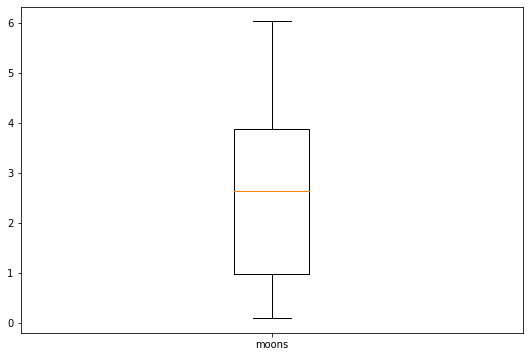

In [71]:
boxplotfig(dataset1["Chi2"], 'moons')

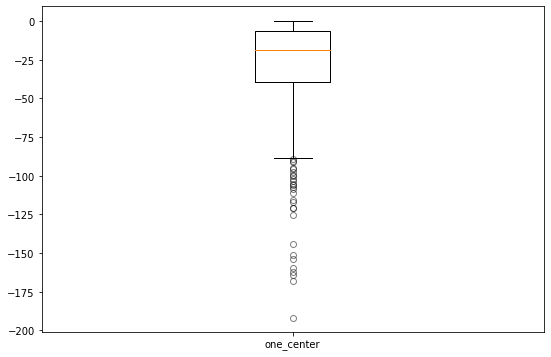

In [72]:
boxplotfig(dataset2["Chi2"], 'one_center')

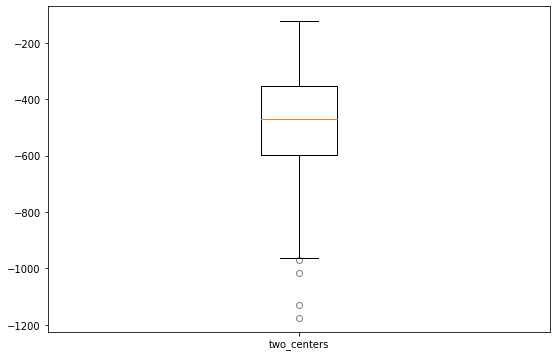

In [73]:
boxplotfig(dataset3["Chi2"], 'two_centers')

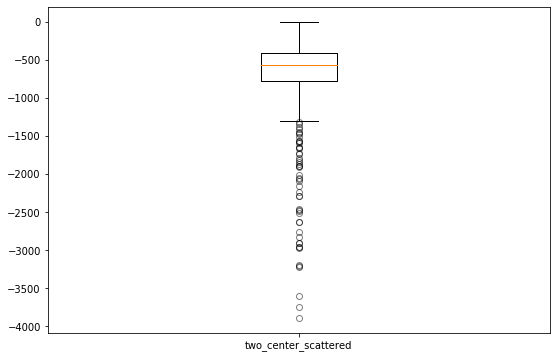

In [74]:
boxplotfig(dataset4["Chi2"], 'two_center_scattered')

- C. Use matplotlib to draw a scatter plot and mark the outlier points in red. Display the regular points in black.

In [81]:
def scatterfig(dataset, datasetname):
    q1 = dataset['Chi2'].quantile(0.25)
    q3 = dataset['Chi2'].quantile(0.75)
    IQR = q3 -q1
    lower = q1 - 1.5*IQR
    upper = q3 + 1.5*IQR
    plt.figure()
    for i in range(0, len(dataset.index)):
        if (dataset.iloc[i,2] > upper) or (dataset.iloc[i,2] < lower):
            plt.plot(dataset.iloc[i,0], dataset.iloc[i,1], 'o', color = 'r')
        else:
            plt.plot(dataset.iloc[i,0], dataset.iloc[i,1], 'o', color = 'k')
    plt.title(datasetname)
    plt.show()

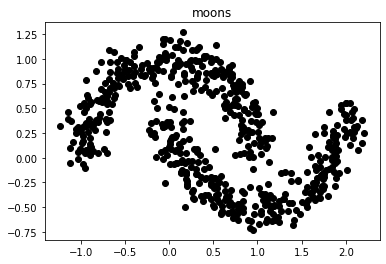

In [82]:
scatterfig(dataset1, "moons")

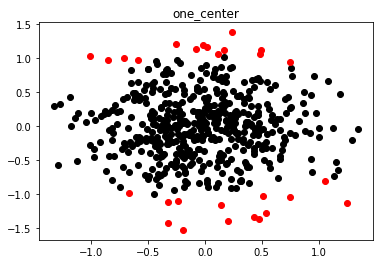

In [83]:
scatterfig(dataset2, "one_center")

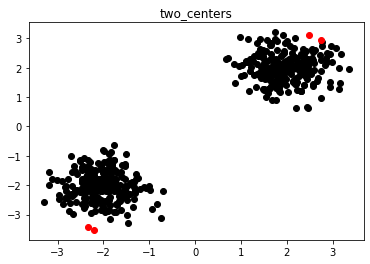

In [84]:
scatterfig(dataset3, "two_centers")

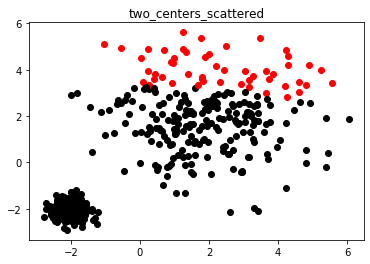

In [85]:
scatterfig(dataset4, "two_centers_scattered")

- D. In your words, explain if this method worked fine or not.

This method doesn't work fine, because the dataset may contains different scale data, such as the two_centers_scatter dataset contains two clusters, but the value scaled sparse in the right top cluster, so by using chi-2 test, the point value is larger, the more possible this point will be regard as the outlier. So this method can not worked fine in the two or more clusters dataset, only can be used better in one cluster dataset. 

### 2. DBScan
- A. Run DBScan with different configurations (only change min_samples and eps).

In [104]:
# Compute DBSCAN
from sklearn.cluster import DBSCAN
from sklearn import metrics
def descan(dataset, eps, min_samples):
    db = DBSCAN(eps, min_samples).fit(dataset)
    labels = db.labels_

#     # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
#     print(n_clusters_)
#     n_noise_ = list(labels).count(-1)
    if n_clusters_ <= 1:
        silhouette = 0
        print(n_clusters_, silhouette)
    else:
        silhouette = metrics.silhouette_score(dataset, labels)
        print(n_clusters_, silhouette)
    return n_clusters_, silhouette


1 0
2 0.0764437248327531
0 0
0 0
0 0
1 0
1 0
2 0.2158622355321754
0 0
0 0
1 0
1 0
1 0
1 0
0 0
1 0
1 0
1 0
1 0
1 0


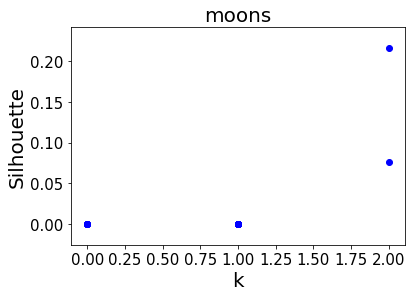

In [139]:
epsilons = [0.2, 0.3, 0.5, 0.8]
min_points = [10, 12, 48, 96, 120]
numer_clusters_ = []
silhouettes = []
for eps in epsilons:
    for min_samples in min_points:  
        n_clusters_, silhouette = descan(dataset1, eps, min_samples)
        numer_clusters_.append(n_clusters_)
        silhouettes.append(silhouette)

# draw the silhouettes in a graph
plt.figure()
plt.title('moons', fontsize = 20.0)
plt.scatter(numer_clusters_, silhouettes, marker='o', c='blue')
plt.xticks(fontsize = 15.0)
plt.yticks(fontsize = 15.0)
plt.xlabel('k', fontsize = 20.0)
plt.ylabel('Silhouette', fontsize = 20.0)
plt.show()

1 0
2 0.14039438379820088
1 0
2 -0.1990715732422329
0 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0


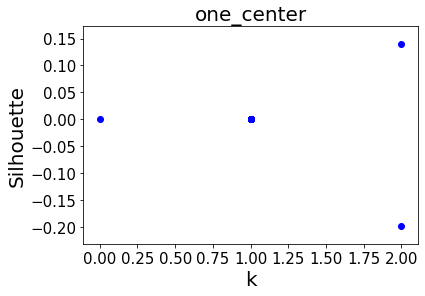

In [142]:
epsilons = [0.2, 0.3, 0.5, 0.8]
min_points = [10, 12, 24, 48, 96]
numer_clusters_ = []
silhouettes = []
for eps in epsilons:
    for min_samples in min_points:  
        n_clusters_, silhouette = descan(dataset2, eps, min_samples)
        numer_clusters_.append(n_clusters_)
        silhouettes.append(silhouette)

# draw the silhouettes in a graph
plt.figure()
plt.title('one_center', fontsize = 20.0)
plt.scatter(numer_clusters_, silhouettes, marker='o', c='blue')
plt.xticks(fontsize = 15.0)
plt.yticks(fontsize = 15.0)
plt.xlabel('k', fontsize = 20.0)
plt.ylabel('Silhouette', fontsize = 20.0)
plt.show()

3 0.14323589132869238
4 -0.09939125796642123
3 -0.4222041714769137
0 0
0 0
2 0.6861496087073237
2 0.6641849296725114
2 0.45972700781528547
2 -0.3262713816876578
0 0
2 0.7346852589039116
2 0.7256219858871387
2 0.7326612358081535
2 0.6768903004183057
2 0.2507417430247577
2 0.8460592570207806
2 0.8460592570207806
2 0.8460592570207806
2 0.8460592570207806
2 0.6592342464737363


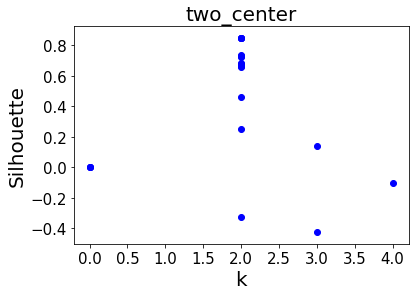

In [144]:
epsilons = [0.2, 0.3, 0.5, 0.8]
min_points = [10, 12, 24, 48, 96]
numer_clusters_ = []
silhouettes = []
for eps in epsilons:
    for min_samples in min_points:  
        n_clusters_, silhouette = descan(dataset3, eps, min_samples)
        numer_clusters_.append(n_clusters_)
        silhouettes.append(silhouette)

# draw the silhouettes in a graph
plt.figure()
plt.title('two_center', fontsize = 20.0)
plt.scatter(numer_clusters_, silhouettes, marker='o', c='blue')
plt.xticks(fontsize = 15.0)
plt.yticks(fontsize = 15.0)
plt.xlabel('k', fontsize = 20.0)
plt.ylabel('Silhouette', fontsize = 20.0)
plt.show()

1 0
1 0
1 0
1 0
0 0
3 0.2696097913577987
1 0
1 0
1 0
1 0
3 0.4821565983858076
3 0.44894214367328783
1 0
1 0
1 0
2 0.6249523715646301
2 0.6094481519170675
2 0.5462489256118865
1 0
1 0


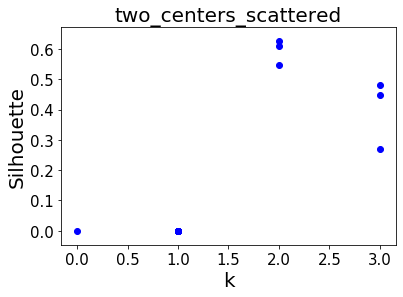

In [150]:
epsilons = [0.2, 0.3, 0.5, 0.8]
min_points = [10, 12, 24, 48, 96]
numer_clusters_ = []
silhouettes = []
for eps in epsilons:
    for min_samples in min_points:  
        n_clusters_, silhouette = descan(dataset4, eps, min_samples)
        numer_clusters_.append(n_clusters_)
        silhouettes.append(silhouette)

# draw the silhouettes in a graph
plt.figure()
plt.title('two_centers_scattered', fontsize = 20.0)
plt.scatter(numer_clusters_, silhouettes, marker='o', c='blue')
plt.xticks(fontsize = 15.0)
plt.yticks(fontsize = 15.0)
plt.xlabel('k', fontsize = 20.0)
plt.ylabel('Silhouette', fontsize = 20.0)
plt.show()

- B. Pick the configuration that, in your opinion, gives the best result. Report the value of min_samples and eps for the best result.

### results:
* moons.csv
    - best result: eps=0.5, min_samples=48
* one_center.csv
    - best result: eps=0.8, min_samples=10
* two_centers.csv
    - best result: eps=0.8, min_samples=48
* two_centers_scattered.csv
    - best result: eps=0.8, min_samples=10

- C. Use matplotlib to draw a scatter plot for the best result and mark the outlier points in red. Display the regular points in black.

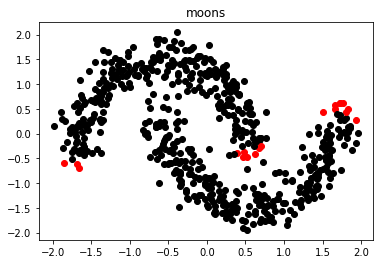

In [153]:
# dataset1
from sklearn.preprocessing import StandardScaler
def dbscan(X, eps, min_samples, datasetname):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    result = db.fit(X)
    labels = result.labels_
    plt.figure()
    for i in range(len(labels)):
        if labels[i] == -1:
            plt.plot(X[i,0], X[i,1], 'o', color = 'r')
        else:
            plt.plot(X[i,0], X[i,1], 'o', color = 'k')
    plt.title(datasetname)
    plt.show()

db = dbscan(dataset1, eps=0.5, min_samples=48, datasetname='moons')

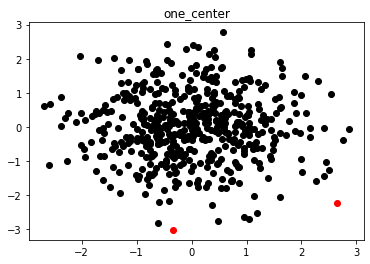

In [134]:
db = dbscan(dataset2, eps=0.8, min_samples=10, datasetname='one_center')

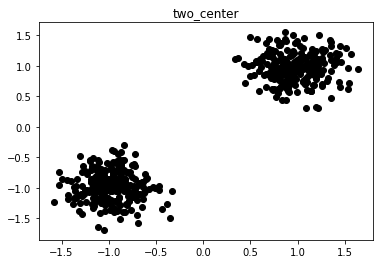

In [149]:
db = dbscan(dataset3, eps=0.8, min_samples=48, datasetname='two_center')

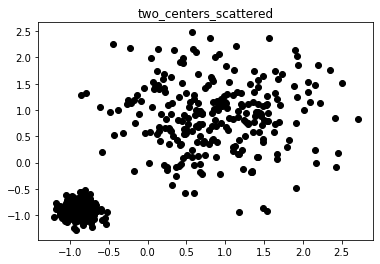

In [151]:
db = dbscan(dataset4, eps=0.8, min_samples=10, datasetname='two_centers_scattered')

- D. Explain if this method worked fine in this case or not.

This method can work better than chi-2 test, because it is a density-based clustering algorithm, for this purpose, DBSCAN works by greedily agglomerating points that are close to each other. Clusters with few points in them are considered outliers. So, if we know the best epsilon and min_points, we can get a good way to detect outliers